# 초음파 광물 예측
- 음파 탐지기 데이터 정보 => 광물과 돌을 구분하는 실험

- 역전파 알고리즘 - 은닉층과 역전파가 얼마나 큰 효과가 있는지

- 광석과 일반 돌을 가져다 놓고 음파 탐지기를 쏜 후 그 결과를 데이터로 정리

- 오차 역전파 알고리즘을 사용한 신경망이 => 얼마나 광석과 돌을 구분하는 데 효과적인지 ?
- 신경망의 예측 정확도는 몇 퍼센트(%)?

- 쉽게 해결하지 못하는, 하지만 머신러닝을 하는 사람이라면 반드시 극복해야 하는 문제인 
‘과적합(overfitting)’

In [1]:
import pandas as pd

df = pd.read_csv('../dataset/sonar.csv', header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [2]:
df.head()
# R = Rock

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.tail()
# M = Mineral (광물)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


- 총 샘플의 수는 208개
- 컬럼 수 61 = 60 Attributes + 1 Class
- 모든 컬럼이 실수형(float64)
- 맨 마지막 컬럼만 object => class => 데이터형 변환이 필요

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
 
import pandas as pd
import numpy as np
import tensorflow as tf
  
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [5]:
# 데이터 입력
df = pd.read_csv('../dataset/sonar.csv', header=None)

dataset = df.values
# X = dataset[:,0:60]
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

In [6]:
# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [7]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
print(type(Y))

<class 'numpy.ndarray'>


In [9]:
print(X)

[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]


In [10]:
print(type(X))

<class 'numpy.ndarray'>


In [11]:
# Failed to convert a NumPy array to a Tensor (Unsupported object type list) : SOLUTION
# X = np.asarray(X).astype(np.float32)
# Y = np.asarray(Y).astype(np.float32)

### np.asarray()
# np.array() : 배열 생성
# np.asarray() : 이미 ndarray의 데이터 형태 (data type)이 설정 되어 있다면, 데이터 형태가 다를 경우에만 복사(copy) 
# np.asfarray() : dtype을 따로 설정하지 않아도, 자동으로 float 형태로 바꾸면서 배열

### np.astype() : 데이터형 dtype 변환 (캐스트)
# a = np.array([1, 2, 3]) 
# print(a) 
# print(a.dtype) 

# a_float = a.astype(np.float32) 
# print(a_float) 
# print(a_float.dtype) 

# print(a) 
# print(a.dtype) 

# [1 2 3]
# int32
# [1. 2. 3.]
# float32
# [1 2 3]
# int32 

In [12]:
# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [15]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)

Epoch 1/200
42/42 [==============================] - 0s 690us/step - loss: 0.2432 - accuracy: 0.5865
Epoch 2/200
42/42 [==============================] - 0s 618us/step - loss: 0.2288 - accuracy: 0.6394
Epoch 3/200
42/42 [==============================] - 0s 595us/step - loss: 0.2187 - accuracy: 0.6490
Epoch 4/200
42/42 [==============================] - 0s 619us/step - loss: 0.2031 - accuracy: 0.7260
Epoch 5/200
42/42 [==============================] - 0s 619us/step - loss: 0.1893 - accuracy: 0.7692
Epoch 6/200
42/42 [==============================] - 0s 643us/step - loss: 0.1802 - accuracy: 0.7596
Epoch 7/200
42/42 [==============================] - 0s 613us/step - loss: 0.1677 - accuracy: 0.7740
Epoch 8/200
42/42 [==============================] - 0s 643us/step - loss: 0.1590 - accuracy: 0.7837
Epoch 9/200
42/42 [==============================] - 0s 643us/step - loss: 0.1558 - accuracy: 0.7885
Epoch 10/200
42/42 [==============================] - 0s 595us/step - loss: 0.1483 - accura

In [16]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

7/7 [==============================] - 0s 570us/step - loss: 0.0054 - accuracy: 0.9952

 Accuracy: 0.9952


In [17]:
# Accuracy: 0.9952

# 과적합(overfitting)
- 모델이 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만, 
- 새로운 데이터에 적용하면 잘 맞지 않는 것
- WHY OCCUR ? 
- 층이 너무 많거나 , 변수가 복잡,  테스트셋과 학습셋이 중복
- (딥러닝은 학습 단계에서 입력층, 은닉층, 출력층의 노드들에 상당히 많은 변수들이 투입) 
- 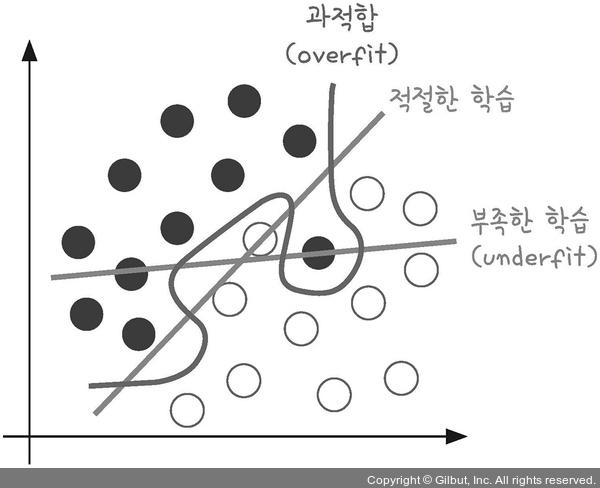

### 과적합 방지
- train set & test set 완전히 구분 
- train & test simultaneously 